In [1]:
#Import Packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.register_matplotlib_converters()

In [2]:
# Import Top YouTube Channel Dataset

## One or more columns use commas per thousands. Therefore we're using the thousands parameter.

df = pd.read_csv('Top YouTube Channels Data .csv',
                 index_col=False,
                 thousands=","
                )

## Data Wrangling and Inspection

In [3]:
#Look at data 

df.head()

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,188073919029,16708.0,Music,2006
1,2,YouTube Movies,150000000,167122746349,NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,126822520940,751.0,Education,2006
3,4,SET India,131000000,101541977714,78334.0,Shows,2006
4,5,Music,116000000,78437871689,NaN,Music,2013


In [4]:
#Check dataset shape

df.shape

(100, 7)

In [5]:
#Checking datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          100 non-null    int64  
 1   youtuber      100 non-null    object 
 2   subscribers   100 non-null    int64  
 3   video views   100 non-null    int64  
 4   video count   95 non-null     float64
 5   category      100 non-null    object 
 6   started       100 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.6+ KB


In [6]:
#video views is correct as an int64 and not an object
#video count needs to be converted

In [19]:
#Convert video count to integer 
df["video count"] = df["video count"].astype(int)

In [20]:
#Column inspection 

df.columns

Index(['rank', 'youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

In [21]:
#the columns contain spaces and they need to be taken out

In [22]:
df = df.rename(columns=lambda x: x.strip())

In [23]:
#Changing output to 0

pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [24]:
#Taking a look at statistics

df.describe(include='all')

,rank,youtuber,subscribers,video views,video count,category,started
count,95,95,95,95,95,95,95
unique,NaN,95,NaN,NaN,NaN,13,NaN
top,NaN,T-Series,NaN,NaN,NaN,Music,NaN
freq,NaN,1,NaN,NaN,NaN,33,NaN
mean,52,NaN,51232632,27670614267,15847,NaN,2011
std,28,NaN,26409466,26287490188,40955,NaN,6
min,1,NaN,32200000,2647950108,45,NaN,1970
25%,28,NaN,36200000,14564059890,394,NaN,2007
50%,52,NaN,42700000,20881421568,1139,NaN,2011
75%,76,NaN,55450000,28147588118,4986,NaN,2014


In [25]:
#Assess for null values

df.isna().sum()

rank           0
youtuber       0
subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64

In [26]:
#Remove NaN values

df.dropna(axis=0,inplace=True)

In [27]:
#After dropping rows with missing values
df.shape

(95, 7)

In [28]:
#Check to make sure data was converted successfully

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         95 non-null     int64 
 1   youtuber     95 non-null     object
 2   subscribers  95 non-null     int64 
 3   video views  95 non-null     int64 
 4   video count  95 non-null     int64 
 5   category     95 non-null     object
 6   started      95 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.9+ KB


In [29]:
#Check for any data that needs to be excluded 

df.iloc[:, 1:5].describe().T

,count,mean,std,min,25%,50%,75%,max
subscribers,95,51232632,26409466,32200000,36200000,42700000,55450000,213000000
video views,95,27670614267,26287490188,2647950108,14564059890,20881421568,28147588118,188073919029
video count,95,15847,40955,45,394,1139,4986,209351


/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='subscribers', ylabel='Density'>

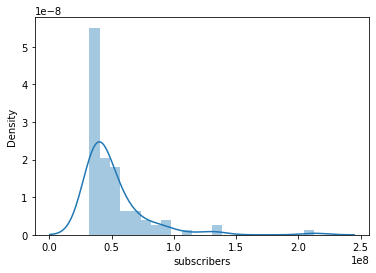

In [30]:
#Look for outliers for subscibers

sns.distplot(df['subscribers'])

/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='video views', ylabel='Density'>

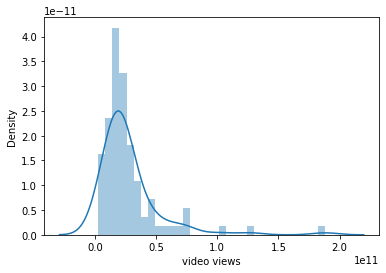

In [31]:
##Look for outliers for video views

sns.distplot(df['video views'])

/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='video count', ylabel='Density'>

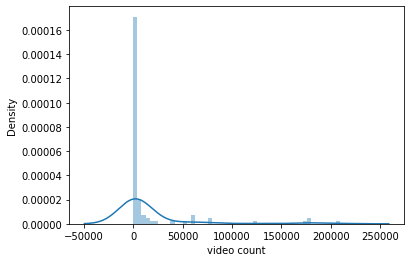

In [32]:
##Look for outliers for video count

sns.distplot(df['video count'])

/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='started', ylabel='Density'>

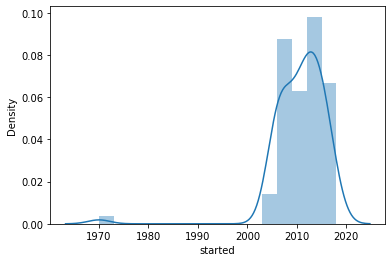

In [33]:
#Look for outliers for started

sns.distplot(df['started'])

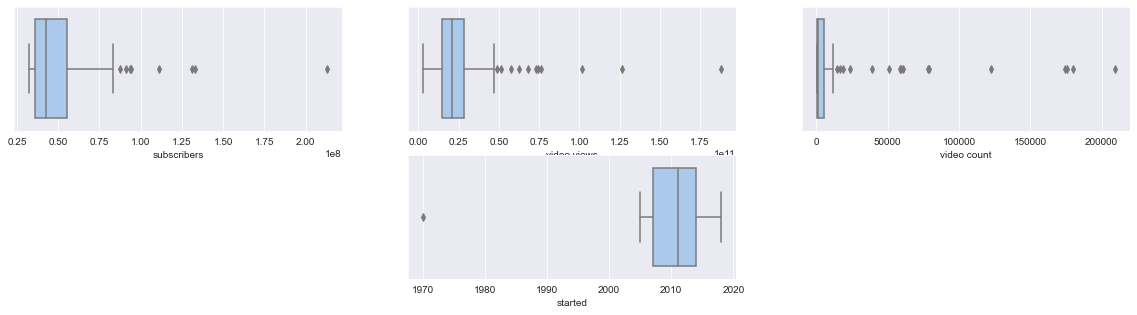

In [34]:
#Check for data that needs to be excluded 

sns.set_style("darkgrid")
plt.figure(figsize=(20,5))
plt.subplot(2,3,1)
sns.boxplot(x= "subscribers", data=df, palette="pastel")
plt.subplot(2,3,2)
sns.boxplot(x="video views", data=df, palette="pastel")
plt.subplot(2,3,3)
sns.boxplot(x= "video count", data=df, palette="pastel")
plt.subplot(2,3,5)
sns.boxplot(x= "started", data=df, palette="pastel")
plt.show()

In [35]:
#Remove outlier from 1970, as it will affect outcome of data and is actually when YouTube got started itself

df = df.loc[df.started != 1970]

## Data Analysis

In [36]:
df.head()

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,188073919029,16708,Music,2006
2,3,Cocomelon - Nursery Rhymes,133000000,126822520940,751,Education,2006
3,4,SET India,131000000,101541977714,78334,Shows,2006
5,6,PewDiePie,111000000,28260779633,4472,Gaming,2010
6,7,MrBeast,93900000,15417304461,721,Entertainment,2012


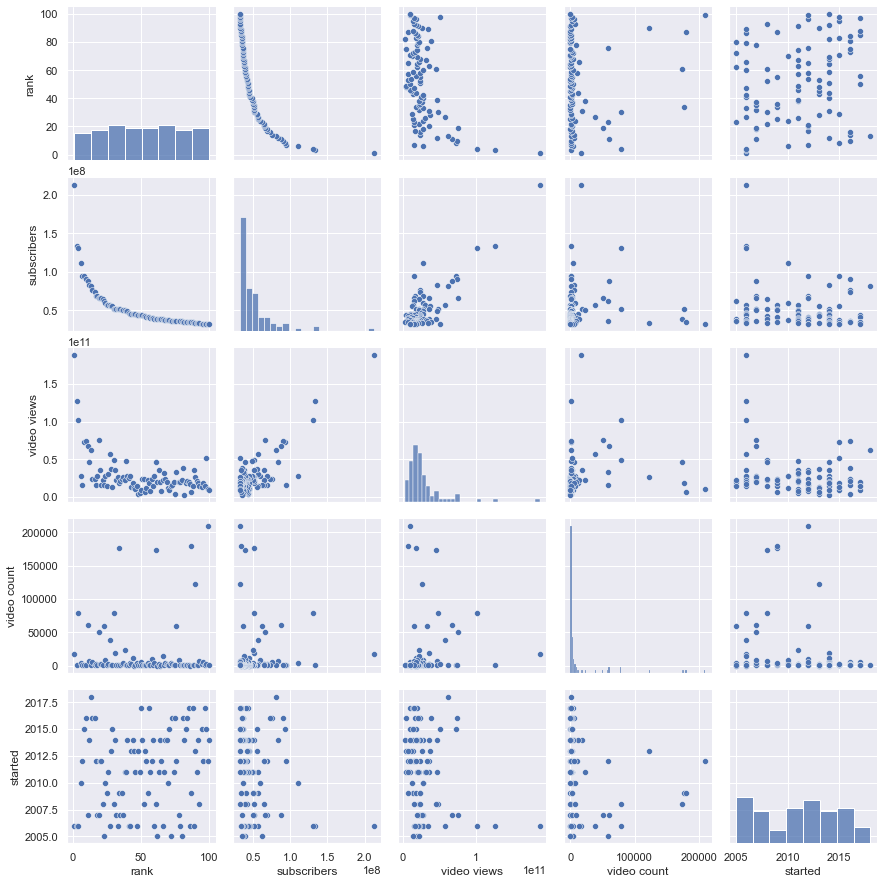

In [39]:
#Pair plot-Purpose: To find correlations and inspect for more outliers. 
sns.set_style("darkgrid")
sns.set_theme("notebook")
sns.pairplot(df)
plt.show()

#### Conclusion:
#### There is a correlation between subscribers and video views.
#### Rank number decreases (which is a good thing) as the number of subscribers increases. 

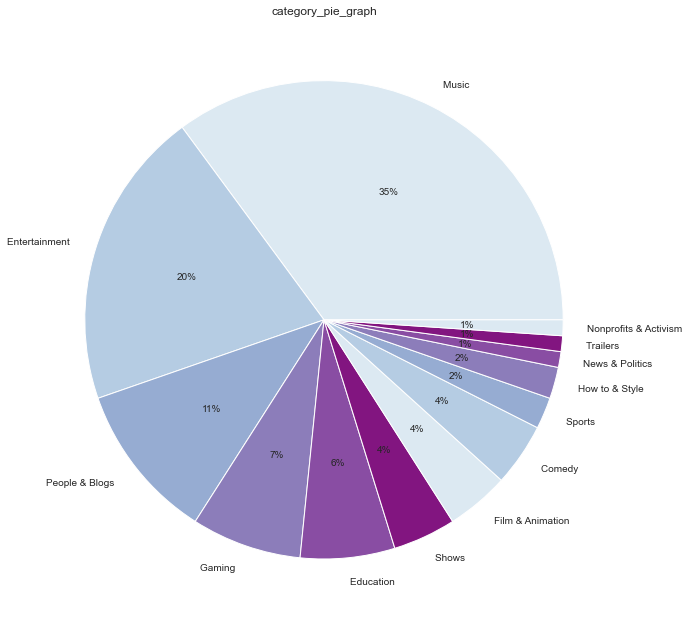

In [37]:
#Categories of Top 100 YouTube Channel Analysis

category = df['category'].value_counts()
plt.figure(figsize=(20,11))
colors = sns.color_palette('BuPu')[0:len(category)]

#create pie chart
plt.pie(x = category.values, labels = category.index, colors = colors, autopct='%.0f%%')
plt.title('category_pie_graph')
plt.show()

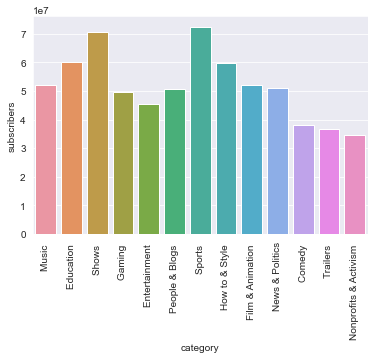

In [38]:
#Subscribers per Category
plot = sns.barplot(x = 'category', y = 'subscribers', data = df, ci = None)
plot.set_xticklabels(labels = list(df['category'].unique()) , rotation = 90)
print()

#### Sports and shows have the highest number of subscribers. 

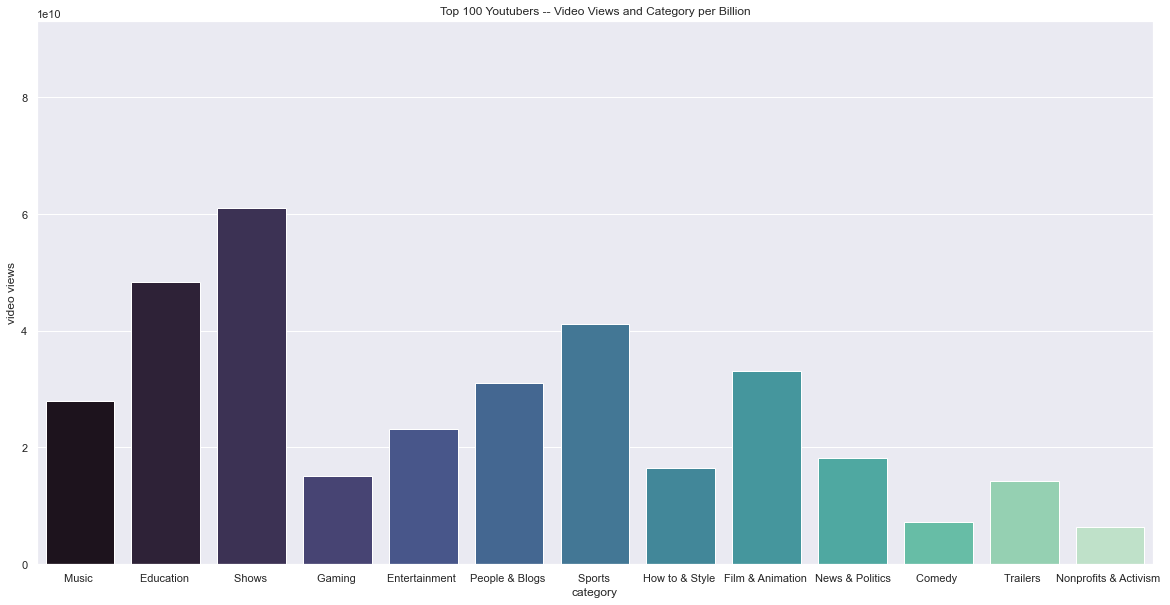

In [40]:
#Categories with most video views

plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.barplot(data=df,
            x="category",
            y="video views",
            errwidth=0, capsize=.2,
            palette="mako"
           )
plt.title("Top 100 Youtubers -- Video Views and Category per Billion")
plt.show()

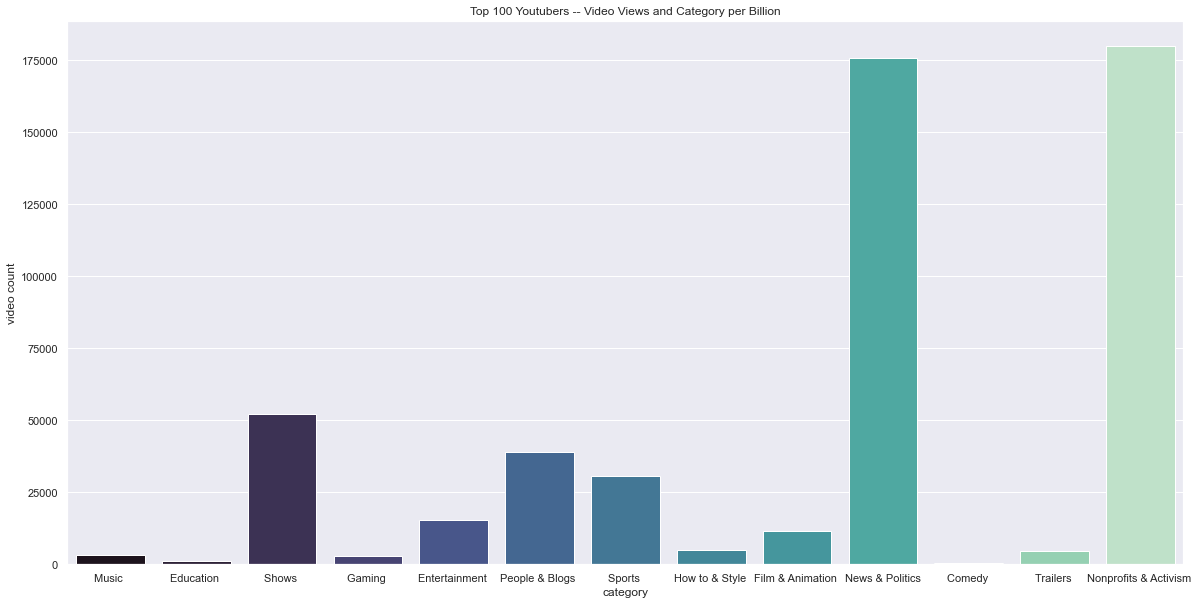

In [53]:
#Categories with most video counts

plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.barplot(data=df,
            x="category",
            y="video count",
            errwidth=0, capsize=.2,
            palette="mako"
           )
plt.title("Top 100 Youtubers -- Video Views and Category per Billion")
plt.show()

#### Conclusion: Shows, education and sports have the highest number of video views.
#### News & politics and non-profits & activisim have the highest number of video count. 

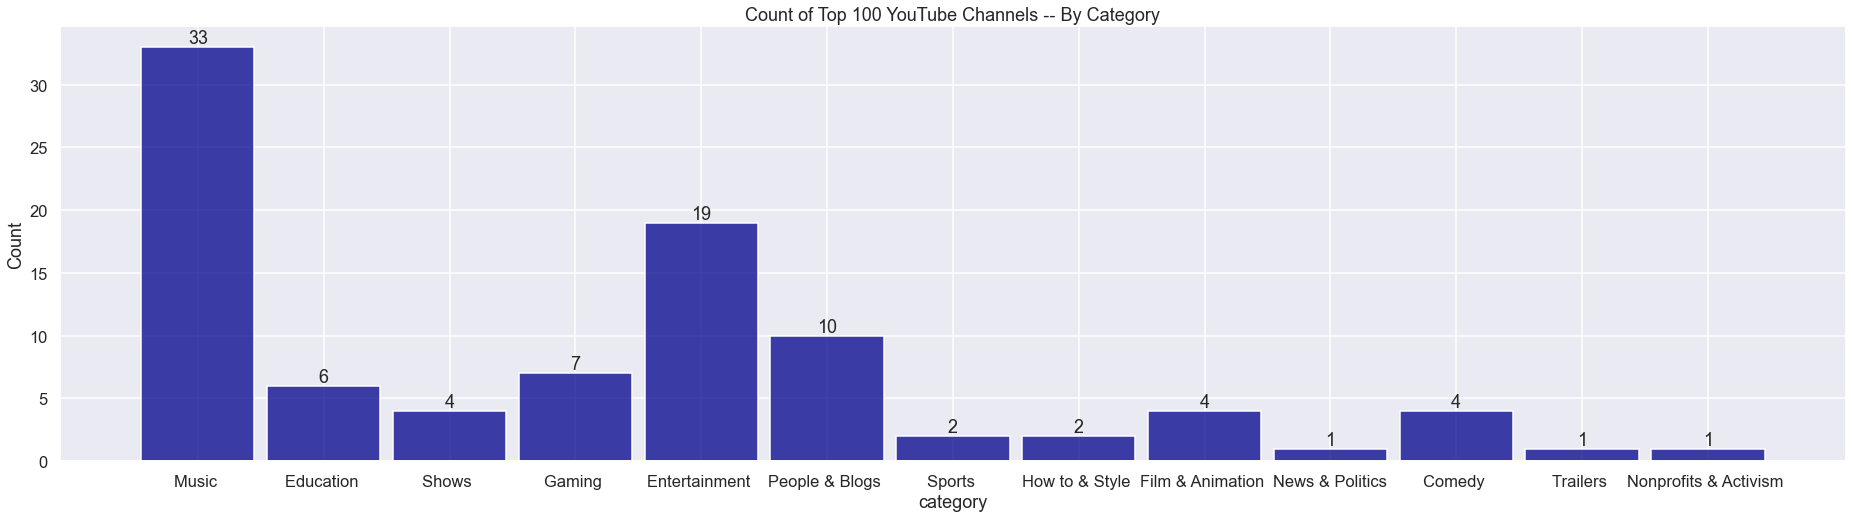

In [41]:
#Most popular category

plt.figure(figsize=(32,8))
sns.set_style("dark")
sns.set_theme("talk")

y= sns.histplot(df["category"], 
             color="DarkBlue",
             shrink=.9
            )

y.bar_label(y.containers[0])
plt.title("Count of Top 100 YouTube Channels -- By Category")
plt.show()

#### Conclusion: Most of the top 100 YouTubers are from the music category. 

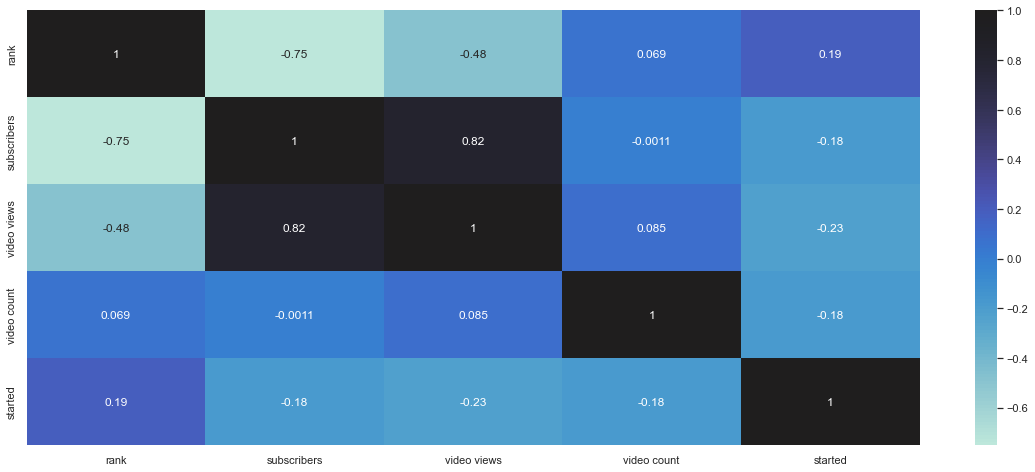

In [42]:
#Check for correlations between data
plt.figure(figsize=(20,8))
sns.set_theme("notebook")
sns.heatmap(df.corr(),annot=True, center=True);

#### Conclusion: 
#### Correlation between Subscribers and Video Views
#### Correlation between Video Count and Rank
#### Negative correlation between Subscribers and Rank 

### Year Analysis

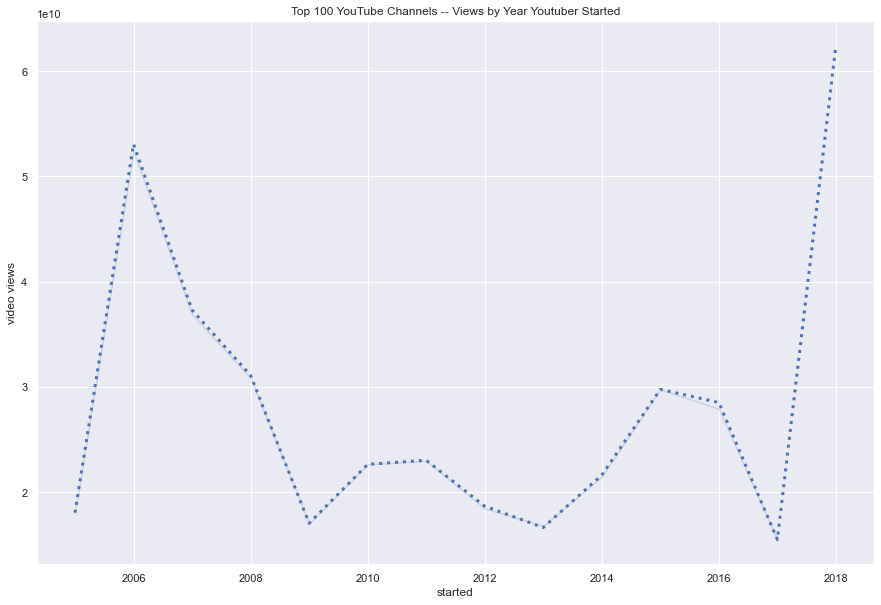

In [43]:
#Start date of most successful YouTubers

plt.figure(figsize=(15,10))
sns.set_theme("notebook")

sns.lineplot(data=df,
             x="started",
             y="video views",
             ci=0,
             linewidth=3,
             linestyle="dotted"
            )

plt.title("Top 100 YouTube Channels -- Views by Year Youtuber Started")
plt.show()

#### Conclusion:
#### Year the channel is started does not correlate with being successful on the platform. We see this by looking at the success for creators that began in 2018. 

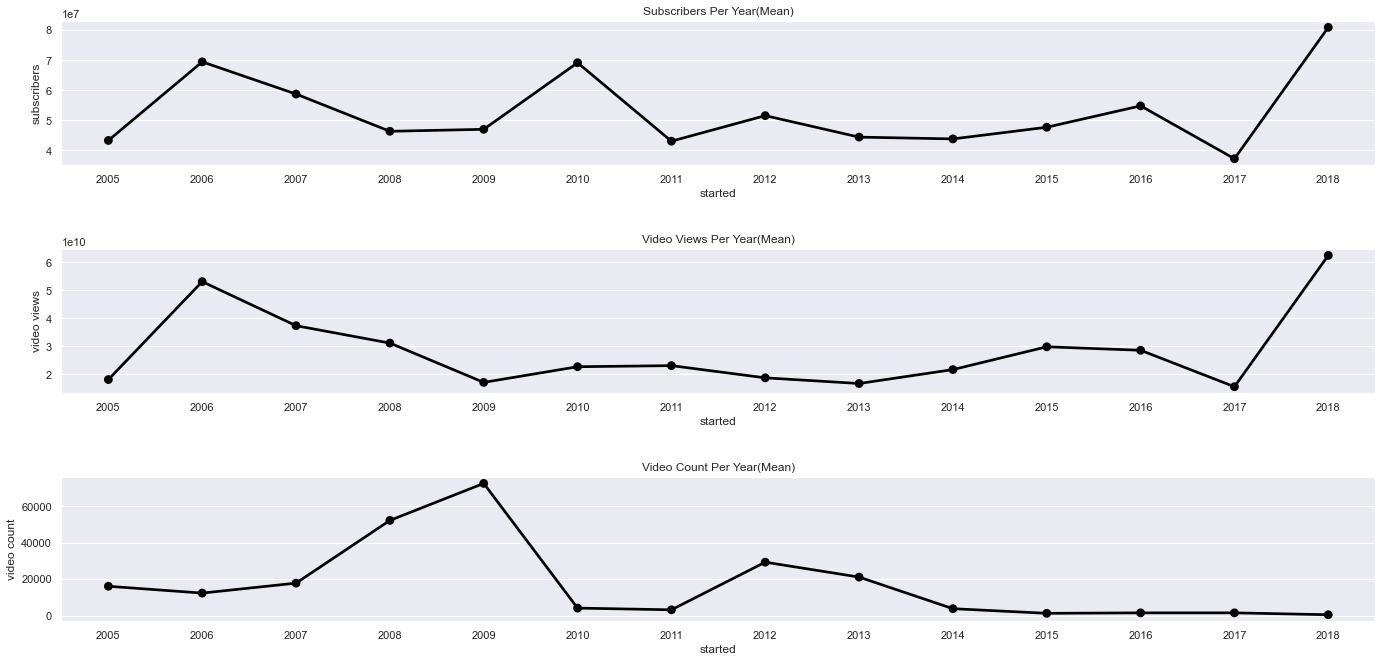

In [60]:
fig, ((ax1),(ax2),(ax3)) = plt.subplots(ncols=1,nrows=3)
fig.set_size_inches(20,10)

year_df = df.groupby('started').mean().reset_index()

sns.pointplot(x=year_df.started,
              y=year_df['subscribers'],
              color='black',
              ax=ax1).set_title('Subscribers Per Year(Mean)')

sns.pointplot(x=year_df.started,
              y=year_df['video views'],
              color = 'black',
              ax=ax2).set_title('Video Views Per Year(Mean)')

sns.pointplot(x=year_df.started,
              y=year_df['video count'],
              color='black',
              ax=ax3).set_title('Video Count Per Year(Mean)')
fig.tight_layout(pad=3.0);

In [61]:
#video count does not appear to influence video views and subscribers per year. 

### YouTuber Analysis

In [73]:
df.youtuber.head(10)

0                       T-Series 
2     Cocomelon - Nursery Rhymes 
3                      SET India 
5                      PewDiePie 
6                        MrBeast 
7                Kids Diana Show 
9                     Like Nastya
10                           WWE 
11             Zee Music Company 
12                 Vlad and Niki 
Name: youtuber, dtype: object

Text(0.5, 1.0, 'Youtubers based on video count')

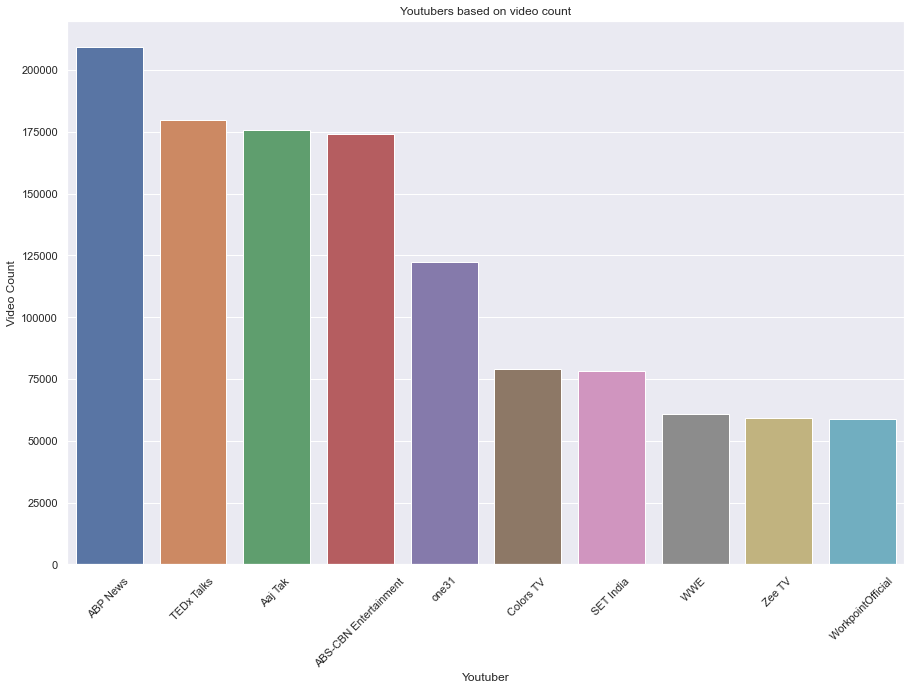

In [74]:
#YouTuber's Video Counts
new_index = (df.sort_values(by=['video count'],ascending=False).head(10)).index.values
sorted_data = df.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['youtuber'], y=sorted_data['video count'])
plt.xticks(rotation= 45)
plt.xlabel('Youtuber')
plt.ylabel('Video Count')
plt.title('Youtubers based on video count')

In [75]:
df.sort_values(by=['video count'],ascending=False).head(10)['youtuber']

98                 ABP News 
86               TEDx Talks 
33                  Aaj Tak 
60    ABS-CBN Entertainment 
89                     one31
29                Colors TV 
3                 SET India 
10                      WWE 
22                   Zee TV 
75        WorkpointOfficial 
Name: youtuber, dtype: object

Text(0.5, 1.0, 'Top 10 youtubers with video views')

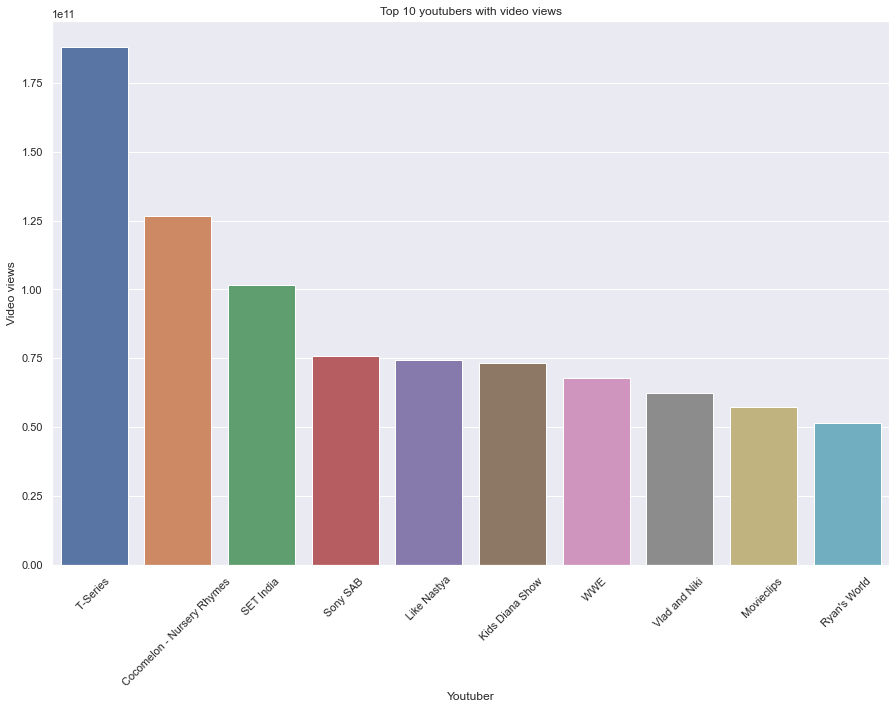

In [76]:
#Top 10 YouTubers based off video views
new_index = (df.sort_values(by=['video views'],ascending=False).head(10)).index.values
sorted_data = df.reindex(new_index)
sorted_data

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['youtuber'], y=sorted_data['video views'])
plt.xticks(rotation= 45)
plt.xlabel('Youtuber')
plt.ylabel('Video views')
plt.title('Top 10 youtubers with video views')

In [77]:
df.sort_values(by=['video views'],ascending=False).head(10)['youtuber']

0                       T-Series 
2     Cocomelon - Nursery Rhymes 
3                      SET India 
18                      Sony SAB 
9                     Like Nastya
7                Kids Diana Show 
10                           WWE 
12                 Vlad and Niki 
26                    Movieclips 
97                  Ryan's World 
Name: youtuber, dtype: object

Text(0.5, 1.0, 'Top 10 youtubers with subscribers')

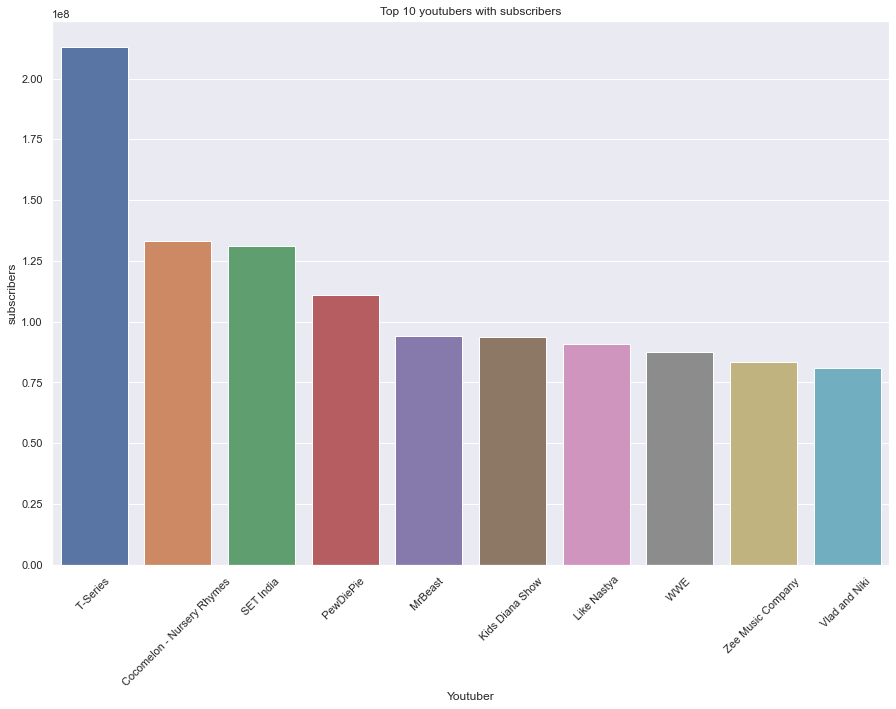

In [78]:
#Top 10 YouTubers based off of subscribers
new_index = (df.sort_values(by=['subscribers'],ascending=False).head(10)).index.values
sorted_data = df.reindex(new_index)
sorted_data

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['youtuber'], y=sorted_data['subscribers'])
plt.xticks(rotation= 45)
plt.xlabel('Youtuber')
plt.ylabel('subscribers')
plt.title('Top 10 youtubers with subscribers')

In [79]:
df.sort_values(by=['subscribers'],ascending=False).head(10)['youtuber']

0                       T-Series 
2     Cocomelon - Nursery Rhymes 
3                      SET India 
5                      PewDiePie 
6                        MrBeast 
7                Kids Diana Show 
9                     Like Nastya
10                           WWE 
11             Zee Music Company 
12                 Vlad and Niki 
Name: youtuber, dtype: object

In [80]:
#Video count does not influence the number of video views or the number of subscribers per channel.

### Relationship Analysis

<AxesSubplot:xlabel='video count', ylabel='video views'>

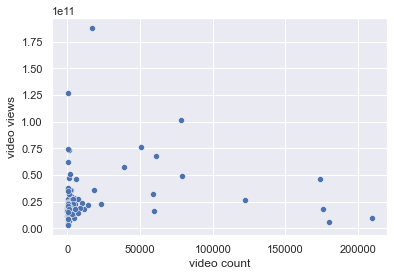

In [64]:
#Relationship between video count and video views 
sns.scatterplot(x = "video count", y =  "video views", data= df)

In [65]:
#An increased video count does not appear to directly result in increased video views. 

<AxesSubplot:xlabel='subscribers', ylabel='video views'>

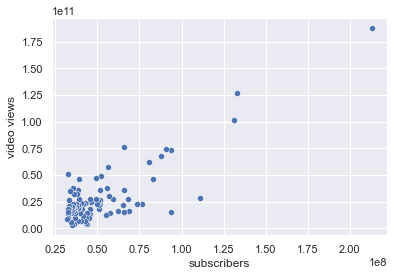

In [66]:
#Relationship between number of subscribers and video views (hypothesis: positive correlation)
sns.scatterplot(x = "subscribers", y =  "video views", data= df)

In [67]:
#video views does seem to be positively correlated with number of subscribers.

<AxesSubplot:xlabel='started', ylabel='video views'>

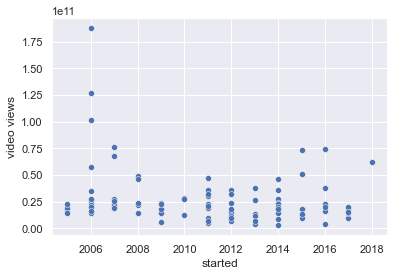

In [68]:
#Relationship between video views and year started
sns.scatterplot(x = 'started', y = "video views" , data= df)

In [69]:
#No correlation 

<AxesSubplot:xlabel='started', ylabel='subscribers'>

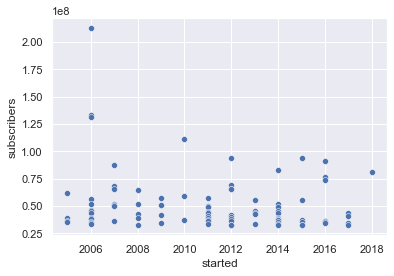

In [70]:
#Relationship between number of subscribers and year started
sns.scatterplot(x = 'started', y = "subscribers" , data= df)

In [71]:
#No correlation

<AxesSubplot:xlabel='video views', ylabel='video count'>

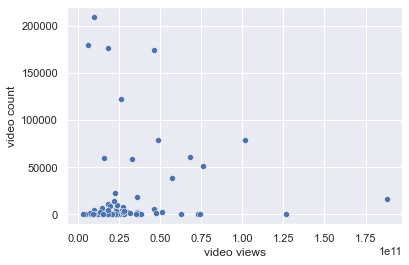

In [72]:
#Relationship between video views and video count
sns.scatterplot(x = "video views", y = "video count" , data= df)

In [ ]:
#No correlation